In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import re

## Vendedores - Seller

In [ ]:
vendedores = pd.read_csv("data\olist_sellers_dataset.csv") #seller

# tabela de vendedores 3095 linhas  4 colunas ('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')

In [ ]:
vendedores.info()

In [ ]:
vendedores.isnull().sum()

In [ ]:
vendedores.columns

In [ ]:
print("Nº total de vendedores exclusivos:",len((vendedores.seller_id).unique()))

In [ ]:
vendedores.to_csv('vendedores.csv')

In [ ]:
vendedores.shape

## Pagamentos - payments

In [ ]:
pagamentos = pd.read_csv("data\olist_order_payments_dataset.csv") #payments


# tabela de pagamentos 103886 linhas  5 colunas ('order_id', 'payment_sequential', 'payment_type','payment_installments', 'payment_value')

In [ ]:
pagamentos.info()

In [ ]:
pagamentos.isnull().sum()

In [ ]:
pagamentos.columns

In [ ]:
pagamentos.groupby('payment_type').size()

In [ ]:
pagamentos.loc[pagamentos['payment_type']=='not_defined']

In [ ]:
pagamentos.drop(index=pagamentos.loc[pagamentos['payment_type']=='not_defined'].index, inplace=True)

In [ ]:
pagamentos['payment_type'].value_counts()

In [ ]:
pagamentos.to_csv('pagamentos.csv')

In [ ]:
pagamentos.shape

## Clientes - customers

In [ ]:
clientes = pd.read_csv("data\olist_customers_dataset.csv") #customers

# tabela de clientes 99441 linhas  5 colunas ('customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state')

In [ ]:
clientes.info()

In [ ]:
clientes.isnull().sum()

In [ ]:
clientes.columns

In [ ]:
clientes.to_csv('clientes.csv')

### Cidade

In [ ]:
clientes.customer_city.unique()

In [ ]:
len(clientes.customer_city.unique())

### Estado

In [ ]:
clientes.customer_state.unique()

In [ ]:
len(clientes.customer_state.unique())

In [ ]:
clientes.groupby('customer_city').count()['customer_id'].reset_index()

In [ ]:
itens = pd.read_csv("Data/itens.csv") 
ordens = pd.read_csv("Data/ordens.csv")
produtos = pd.read_csv("Data/produtos.csv")
geolocal = pd.read_csv("Data/geolocal.csv")
clientes = pd.read_csv("Data/clientes.csv")
avaliacoes = pd.read_csv('Data/avaliacoes.csv')
vendedores = pd.read_csv("Data/vendedores.csv")
pagamentos = pd.read_csv("Data/pagamentos.csv")

In [ ]:
ordens['order_status'].value_counts()

In [ ]:
avaliacoes.columns


In [ ]:
avaliacoes['review_score'].value_counts()

In [ ]:
df.merge(vendedores, on='seller_id')

In [ ]:
pd.merge(ordens,pagamentos, on='order_id')

In [ ]:
df.merge(clientes, on='customer_id')

In [ ]:
df.merge(itens, on='order_id')

## Avaliações

In [ ]:
avaliacoes = pd.read_csv('Data/avaliacoes.csv') # reviews

In [ ]:
avaliacoes.shape

In [ ]:
avaliacoes.isnull().sum()

In [ ]:
avaliacoes.drop_duplicates(inplace=True)

In [ ]:
avaliacoes.shape

In [ ]:
df = pd.merge(ordens,pagamentos, on='order_id')
df = df.merge(clientes, on='customer_id')
df = df.merge(itens, on='order_id')
df = df.merge(produtos, on='product_id')
df = df.merge(produtos, on='product_category_name')
df = df.merge(avaliacoes, on='order_id')
df = df.merge(vendedores, on='seller_id')

In [ ]:
ordens['order_purchase_year'] = ordens['order_purchase_timestamp'].apply(lambda x: x.year)
ordens['order_purchase_month'] = ordens['order_purchase_timestamp'].apply(lambda x: x.month)
ordens['order_purchase_month_name'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%b')if x==x else x )
ordens['order_purchase_year_month'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m')if x==x else x )
ordens['order_purchase_date'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y,%m,%d')if x==x else x )

# GETTING VALUES FOR PURCHASE DAY, DAY OF WEEK, AND DAY NAME
ordens['order_purchase_day'] = ordens['order_purchase_timestamp'].apply(lambda x: x.day)
ordens['order_purchase_dayofweek'] = ordens['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
ordens['order_purchase_dayofweek_name'] = ordens['order_purchase_timestamp'].apply(lambda x: x.strftime('%a')if x==x else x )

# GETTING VALUES FOR SPECIFIC TIME OF A DAY 
ordens['order_purchase_hour'] = ordens['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
ordens['order_purchase_time_day'] = pd.cut(ordens['order_purchase_hour'], hours_bins, labels=hours_labels)
ordens[:5]

In [ ]:
ordens['order_purchase_timestamp']

In [ ]:
ordens.columns

In [ ]:
order_delivered_customer_date_y


In [ ]:
order_estimated_delivery_date_y


## Novo data frame unifica

In [ ]:
df1 = pd.read_csv('Data/df.csv')

In [ ]:
df1

In [ ]:
df1.info()

In [ ]:
df1['order_delivered_carrier_date_y']

In [ ]:
df1['order_estimated_delivery_date_y']

In [ ]:
times_cols = ['order_estimated_delivery_date_y', 'order_delivered_customer_date_y']
for col in times_cols:
    df1[col] = pd.to_datetime(df1[col])

In [71]:
df.head()

NameError: name 'df' is not defined

In [ ]:
times_cols = ['order_estimated_delivery_date_y', 'order_delivered_customer_date_y']
for col in times_cols:
    df1[col] = pd.to_datetime(df1[col])

In [ ]:
df1['order_estimated_delivery_date_y']

In [ ]:
import datetime

In [ ]:
df1.head(2)

## Diferença entre dias

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
 df1['antecipacao_entrega']= df1['order_estimated_delivery_date_y'] - df1['order_delivered_customer_date_y']

In [ ]:
 df1['antecipacao_entrega']

In [ ]:
import seaborn as sns
sns.heatmap(df1.isnull(), cbar=False, cmap='PuBu')

In [ ]:
df1.corr()

## Análise exploratória

In [15]:
df1 = pd.read_csv('Data/df.csv')

In [16]:
df1.head(2)

,Unnamed: 0.1,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,...,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,Unnamed: 0,review_id,review_score,review_creation_date,review_answer_timestamp
0,0,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.0,...,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.0,...,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59


In [17]:
print("Number of rows after merging:",len(df1))
print("Number of columns after merging:",len(df1.columns))

Number of rows after merging: 113131
Number of columns after merging: 37


In [18]:
df1.isnull().sum()

Unnamed: 0.1                          0
seller_id                           759
seller_zip_code_prefix              759
seller_city                         759
seller_state                        759
order_id                              0
order_item_id                       759
product_id                          759
shipping_limit_date                 759
price                               759
freight_value                       759
customer_id_x                         0
order_status_x                        0
order_purchase_timestamp_x            0
order_approved_at_x                   0
order_delivered_carrier_date_x        0
order_delivered_customer_date_x       0
order_estimated_delivery_date_x       0
Unnamed: 0_x                       2358
product_category_name              2358
product_weight_g                   2358
product_length_cm                  2358
product_height_cm                  2358
product_width_cm                   2358
Unnamed: 0_y                          0


In [19]:
times_cols = ['order_estimated_delivery_date_y', 'order_delivered_customer_date_y']
for col in times_cols:
    df1[col] = pd.to_datetime(df1[col])


In [20]:
df1['antecipacao_entrega']= df1['order_estimated_delivery_date_y'] - df1['order_delivered_customer_date_y']

In [21]:
df1['antecipacao_entrega'] = df1['antecipacao_entrega'].dt.days

In [22]:
df_value = df1.groupby('seller_id', as_index=False)['review_score'].std()

In [23]:
df3 = pd.DataFrame(df1['seller_id'].value_counts()).merge(df_value, left_index=True, right_on='seller_id')

In [24]:
df3.loc[df3['seller_id_x']>=10]

,seller_id,seller_id_x,seller_id_y,review_score
1232,6560211a19b47992c3666cc44a7e94c0,2020,6560211a19b47992c3666cc44a7e94c0,1.408321
878,4a3ca9315b744ce9f8e9374361493884,1984,4a3ca9315b744ce9f8e9374361493884,1.449560
368,1f50f920176fa81dab994f9023523100,1932,1f50f920176fa81dab994f9023523100,1.449192
2476,cc419e0650a3c5ba77189a1882b7556a,1811,cc419e0650a3c5ba77189a1882b7556a,1.365566
2638,da8622b14eb17ae2831f4ac5b9dab84a,1568,da8622b14eb17ae2831f4ac5b9dab84a,1.347194
...,...,...,...,...
2429,c878515173c84a492ebe50d6b493230b,10,c878515173c84a492ebe50d6b493230b,1.686548
1456,76c47a299e4a8fe992316a85865acbe9,10,76c47a299e4a8fe992316a85865acbe9,0.632456
1807,9449f25aeaf531019b76999ea49a6949,10,9449f25aeaf531019b76999ea49a6949,1.414214
1111,5b2e94f2c22b39ccc24d34ad0f669672,10,5b2e94f2c22b39ccc24d34ad0f669672,0.316228


<AxesSubplot:xlabel='review_score', ylabel='seller_id_x'>

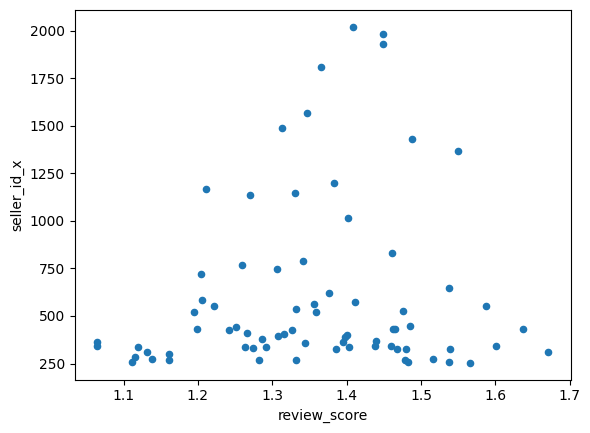

In [25]:
df3.loc[df3['seller_id_x']>=250].plot.scatter(x='review_score', y='seller_id_x')

<AxesSubplot:ylabel='Frequency'>

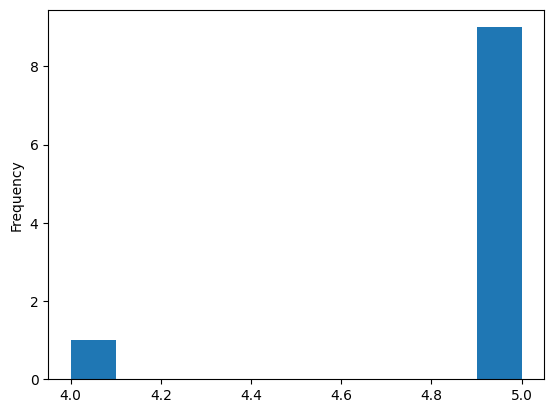

In [26]:
df1.loc[df1['seller_id']=='5b2e94f2c22b39ccc24d34ad0f669672','review_score'].plot.hist()

In [27]:
df1.columns

Index(['Unnamed: 0.1', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'order_id', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'Unnamed: 0_x',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'Unnamed: 0_y',
       'customer_id_y', 'order_status_y', 'order_purchase_timestamp_y',
       'order_approved_at_y', 'order_delivered_carrier_date_y',
       'order_delivered_customer_date_y', 'order_estimated_delivery_date_y',
       'Unnamed: 0', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'antecipacao_entrega'],
      dtype='object')

In [28]:
df1['product_weight_g'].fillna(df1['product_weight_g'].median(),inplace=True)
df1['product_length_cm'].fillna(df1['product_length_cm'].median(),inplace=True)
df1['product_height_cm'].fillna(df1['product_height_cm'].median(),inplace=True)
df1['product_width_cm'].fillna(df1['product_width_cm'].median(),inplace=True)

In [29]:
df1.isnull().sum()

Unnamed: 0.1                          0
seller_id                           759
seller_zip_code_prefix              759
seller_city                         759
seller_state                        759
order_id                              0
order_item_id                       759
product_id                          759
shipping_limit_date                 759
price                               759
freight_value                       759
customer_id_x                         0
order_status_x                        0
order_purchase_timestamp_x            0
order_approved_at_x                   0
order_delivered_carrier_date_x        0
order_delivered_customer_date_x       0
order_estimated_delivery_date_x       0
Unnamed: 0_x                       2358
product_category_name              2358
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0
product_width_cm                      0
Unnamed: 0_y                          0


In [30]:
df1.review_score.value_counts()

5    63596
4    21348
1    14775
3     9476
2     3936
Name: review_score, dtype: int64

In [31]:
corr_matrix = df1.corr()

In [32]:
corr_matrix["review_score"].sort_values(ascending=False)

review_score              1.000000
antecipacao_entrega       0.262672
seller_zip_code_prefix    0.025903
Unnamed: 0_x              0.006399
Unnamed: 0                0.001331
Unnamed: 0.1              0.001327
Unnamed: 0_y             -0.002894
price                    -0.003941
product_width_cm         -0.009895
product_length_cm        -0.017471
product_height_cm        -0.025374
product_weight_g         -0.025611
freight_value            -0.036179
order_item_id            -0.130890
Name: review_score, dtype: float64

In [33]:
corr_matrix["antecipacao_entrega"].sort_values(ascending=False)

antecipacao_entrega       1.000000
review_score              0.262672
seller_zip_code_prefix    0.116573
freight_value             0.037186
order_item_id             0.026443
Unnamed: 0_y              0.002856
price                     0.000563
product_height_cm        -0.000086
product_width_cm         -0.000845
Unnamed: 0.1             -0.001881
Unnamed: 0               -0.001889
Unnamed: 0_x             -0.004271
product_length_cm        -0.008824
product_weight_g         -0.009564
Name: antecipacao_entrega, dtype: float64

## Verificando IDs unicos

In [34]:
print("Número total de seller_id unico:",len((df1.seller_id).unique()))
print("Número total de product_id unico:",len((df1.product_id).unique()))
print("Número total de customer_id_x unico:",len((df1.customer_id_x).unique()))

Número total de seller_id unico: 3091
Número total de product_id unico: 32790
Número total de customer_id_x unico: 98673


## Gráficos

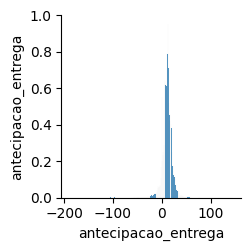

In [35]:
sns.pairplot(df1[['seller_id', 'antecipacao_entrega']])
plt.show()

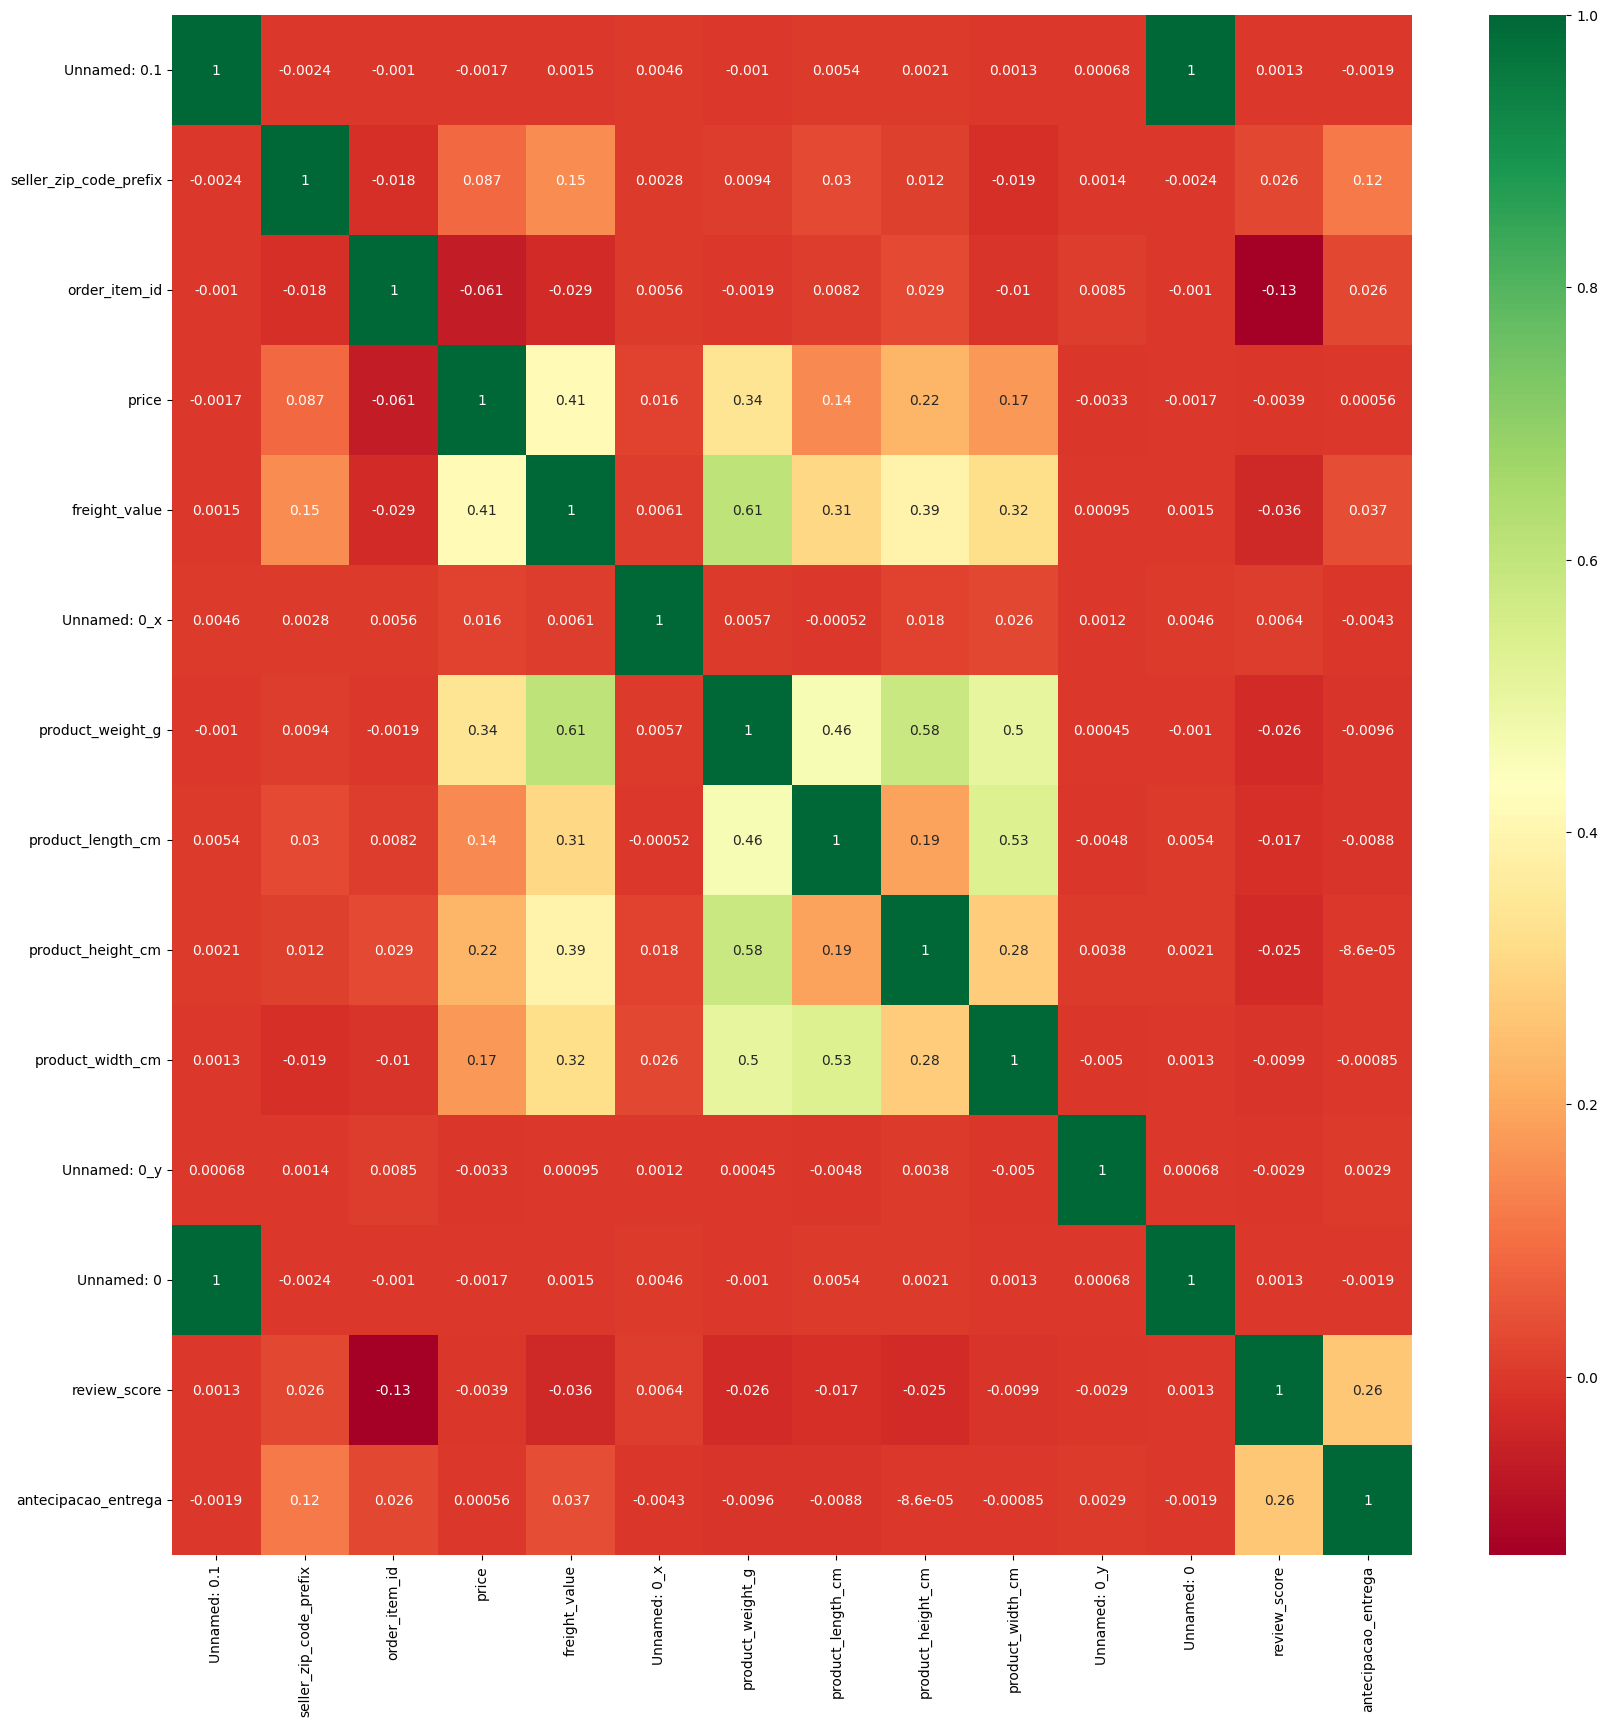

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = df1.corr()
top_corr_features = matriz_corr.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

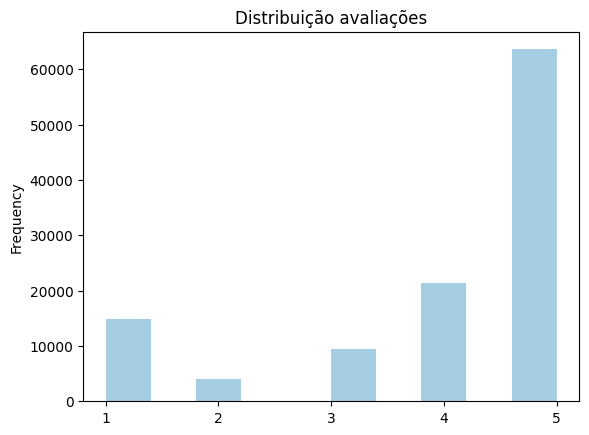

In [37]:
df1['review_score'].plot.hist(title='Distribuição avaliações',cmap='Paired')
plt.xticks([1,2,3,4,5])
plt.show()

In [64]:
df1

,Unnamed: 0.1,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,...,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,Unnamed: 0,review_id,review_score,review_creation_date,review_answer_timestamp,antecipacao_entrega
0,0,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59,15
1,1,6d803cb79cc31c41c4c789a75933b3c7,14600.0,sao joaquim da barra,SP,73fc7af87114b39712e6da79b0a377eb,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,2018-01-18 15:47:59,185.00,...,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,0,7bc2406110b926393aa56f80a40eba40,4,2018-01-18 00:00:00,2018-01-18 21:46:59,15
2,2,8e6d7754bc7e0f22c96d255ebda59eba,12233.0,sao jose dos campos,SP,a548910a1c6147796b98fdf73dbeba33,1.0,be0dbdc3d67d55727a65d4cd696ca73c,2018-03-06 12:48:39,79.79,...,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,1,80e641a11e56f04c1ad469d5645fdfde,5,2018-03-10 00:00:00,2018-03-11 03:05:13,4
3,3,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,f9e4b658b201a9f2ecdecbb34bed034b,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,2018-02-08 10:31:15,149.00,...,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,2,228ce5500dc1d8e020d8d1322874b6f0,5,2018-02-17 00:00:00,2018-02-18 14:36:24,20
4,4,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG,658677c97b385a9be170737859d3511b,1.0,52c80cedd4e90108bf4fa6a206ef6b03,2017-04-13 17:55:19,179.99,...,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,3,e64fb393e7b32834bb789ff8bb30750e,5,2017-04-21 00:00:00,2017-04-21 22:02:06,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,113126,5343d0649eca2a983820bfe93fc4d17e,9270.0,santo andre,SP,2a8c23fee101d4d5662fa670396eb8da,1.0,4fb209073dc2ab6a6d3c259a7c285501,2018-07-02 17:30:37,226.77,...,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,99219,574ed12dd733e5fa530cfd4bbf39d7c9,5,2018-07-07 00:00:00,2018-07-14 17:18:30,13
113127,113127,46dc3b2cc0980fb8ec44634e21d2718e,22240.0,rio de janeiro,RJ,22ec9f0669f784db00fa86d035cf8602,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,2017-12-07 22:08:00,199.99,...,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,99220,f3897127253a9592a73be9bdfdf4ed7a,5,2017-12-09 00:00:00,2017-12-11 20:06:42,11
113128,113128,17ca9b9e9b9ef8fdb529001b49ebb50f,32677.0,betim,MG,55d4004744368f5571d1f590031933e4,1.0,8ba0118a487ec8671aed57e5ef846574,2018-03-22 10:08:04,215.97,...,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,99221,b3de70c89b1510c4cd3d0649fd302472,5,2018-03-22 00:00:00,2018-03-23 09:10:43,15
113129,113129,8d956fec2e4337affcb520f56fd8cbfd,9780.0,sao bernardo do campo,SP,7725825d039fc1f0ceb7635e3f7d9206,1.0,73a7fbf8c1048131f3b531af31bcdf0e,2018-06-26 18:15:29,50.95,...,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,99222,1adeb9d84d72fe4e337617733eb85149,4,2018-07-01 00:00:00,2018-07-02 12:59:13,15


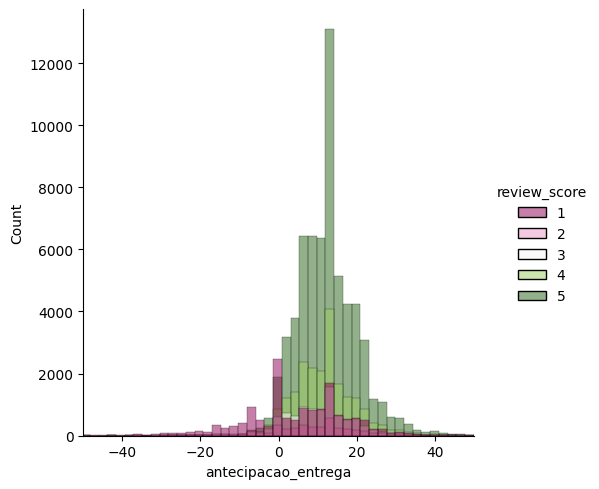

In [38]:
sns.displot(data=df1, x="antecipacao_entrega", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.show()

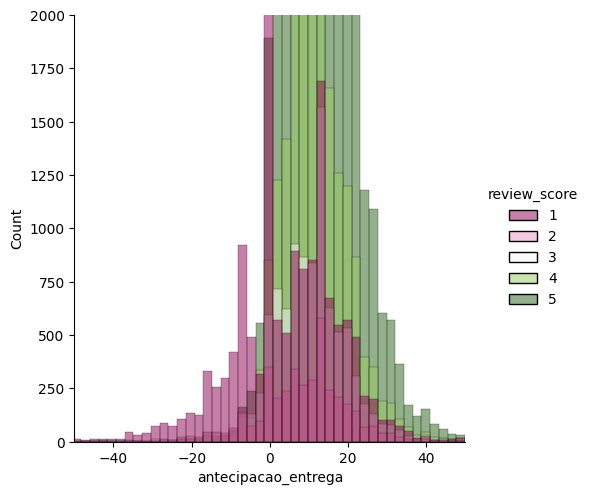

In [39]:
sns.displot(data=df1, x="antecipacao_entrega", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.ylim((0,2000))

plt.show()

Quando o tempo de entrega real é maior do que o esperado, o número de avaliações insatisfeitas aumenta notavelmente.

## Analisando categoria com score

Filtro para mostrar apenas categorias com mais de 50 avaliações

In [40]:
avg_score_por_categoria = df1.groupby('product_category_name', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_por_categoria.columns = ['product_category_name', 'count', 'mean']

avg_score_por_categoria = avg_score_por_categoria[avg_score_por_categoria['count'] > 50]
avg_score_por_categoria = avg_score_por_categoria.sort_values(by='mean', ascending=False)
avg_score_por_categoria

,product_category_name,count,mean
48,livros_interesse_geral,549,4.446266
22,construcao_ferramentas_ferramentas,99,4.444444
47,livros_importados,60,4.400000
49,livros_tecnicos,266,4.368421
2,alimentos_bebidas,279,4.315412
50,malas_acessorios,1088,4.315257
64,portateis_casa_forno_e_cafe,76,4.302632
34,fashion_calcados,261,4.233716
1,alimentos,495,4.218182
18,cine_foto,73,4.205479


In [ ]:
categoria_avaliacao = pd.crosstab(df1['product_category_name'], df1['review_score'], margins=True, margins_name='total_counts')
categoria_avaliacao.drop('total_counts', axis=0, inplace=True)
categoria_avaliacao.sort_values(by='total_counts', ascending=False, inplace=True)
categoria_avaliacao.drop('total_counts', axis=1)[:50].plot(kind='bar', stacked=True,
                                                        figsize=(10,6), width=0.3,cmap='vlag_r')
plt.title('Review scores based on product categories', fontsize=14)
plt.xlabel('Product categories')
plt.ylabel('Number of reviews')
plt.show()

## Como as classes se relacionam com as categorias e pontuações de revisão?¶

In [ ]:
df1.columns

## Criando 2 data frame para geolocalização

In [ ]:
geolocal = pd.read_csv("Data/geolocal.csv")

In [ ]:
geolocal.shape

In [ ]:
geolocal.isnull().sum()

In [ ]:
geolocal = geolocal.drop(['geolocation_city', 'geolocation_state'], axis=1)
geolocal = geolocal.drop_duplicates(subset = ['geolocation_zip_code_prefix'],ignore_index=True)

In [ ]:
geo_cliente = geolocal.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix",
                                                  "geolocation_lat":"customer_lat",
                                                  "geolocation_lng":"customer_lng"})
geo_vendedor = geolocal.rename(columns={"geolocation_zip_code_prefix":"seller_zip_code_prefix",
                                                  "geolocation_lat":"seller_lat",
                                                  "geolocation_lng":"seller_lng"})
geo_cliente.head()

O order_item_id representa a quantidade do item em cada pedido. 

In [ ]:
df6 = pd.read_csv('Data/df.csv') %#criado a partir do DF

In [ ]:
df6.product_category_name.unique()

## Data Frame agregado com colunas selecionadas

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [51]:
categ_vendedor =  pd.read_csv('Data/seller_category.csv')
categ_vendedor

,Unnamed: 0,seller_id,product_category_name,vendas_total,entrega_antecipacao,score
0,0,0015a82c2db000af6aaaf3ae2ecb0532,eletroportateis,3,12.0,5.0
1,1,001cca7ae9ae17fb1caed9dfb1094831,construcao_ferramentas_construcao,27,10.0,4.0
2,2,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,209,13.0,5.0
3,3,001e6ad469a905060d959994f1b41e4f,esporte_lazer,1,0.0,1.0
4,4,002100f778ceb8431b7a1020ff7ab48f,moveis_decoracao,56,8.0,5.0
...,...,...,...,...,...,...
6331,6331,ffff564a4f9085cd26170f4732393726,automotivo,10,21.5,1.0
6332,6332,ffff564a4f9085cd26170f4732393726,construcao_ferramentas_construcao,1,0.0,1.0
6333,6333,ffff564a4f9085cd26170f4732393726,eletronicos,2,44.5,5.0
6334,6334,ffff564a4f9085cd26170f4732393726,market_place,1,51.0,5.0


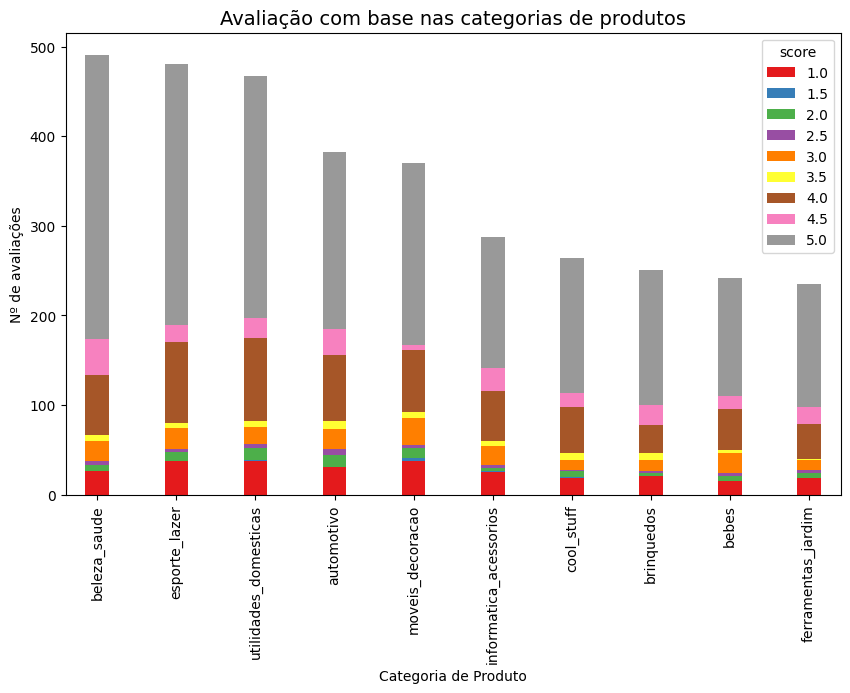

In [52]:
categ_score_vendedor = pd.crosstab(categ_vendedor['product_category_name'], categ_vendedor['score'], margins=True, margins_name='total_counts')
categ_score_vendedor.drop('total_counts', axis=0, inplace=True)
categ_score_vendedor.sort_values(by='total_counts', ascending=False, inplace=True)
categ_score_vendedor.drop('total_counts', axis=1)[:10].plot(kind='bar', stacked=True,
                                                        figsize=(10,6), width=0.3,cmap='Set1')

plt.title('Avaliação com base nas categorias de produtos', fontsize=14)
plt.xlabel('Categoria de Produto')
plt.ylabel('Nº de avaliações')
plt.show()

In [53]:
avg_score_por_categoria = categ_vendedor.groupby('product_category_name', as_index=False).agg({'score': ['count', 'mean']})
avg_score_por_categoria.columns = ['product_category_name', 'count', 'mean']

avg_score_por_categoria = avg_score_por_categoria[avg_score_por_categoria['count'] > 50]
avg_score_por_categoria = avg_score_por_categoria.sort_values(by='mean', ascending=False)
avg_score_por_categoria

,product_category_name,count,mean
48,livros_interesse_geral,54,4.629630
50,malas_acessorios,73,4.575342
59,papelaria,173,4.476879
1,alimentos,58,4.448276
11,beleza_saude,491,4.432790
63,pet_shop,137,4.394161
13,cama_mesa_banho,195,4.335897
33,fashion_bolsas_e_acessorios,99,4.333333
12,brinquedos,251,4.292829
32,esporte_lazer,481,4.287942


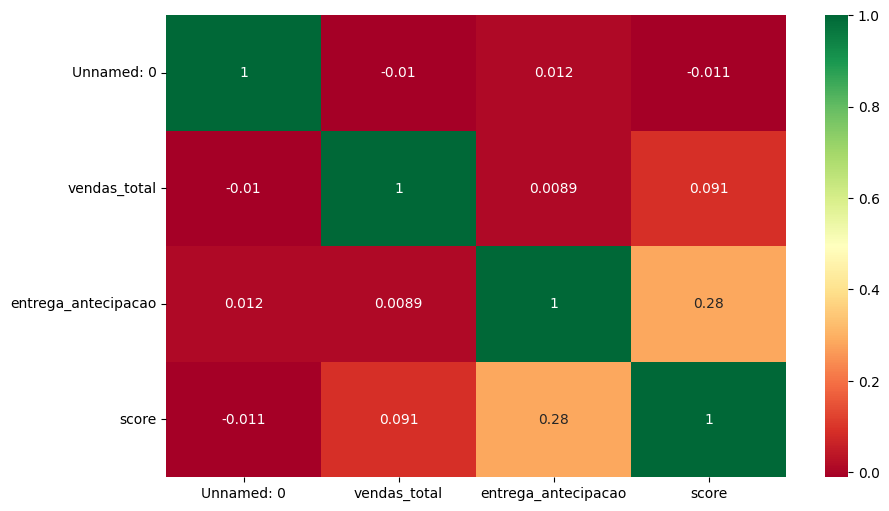

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = categ_vendedor.corr()
top_corr_features = matriz_corr.index
plt.figure(figsize=(10,6))

g=sns.heatmap(categ_vendedor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

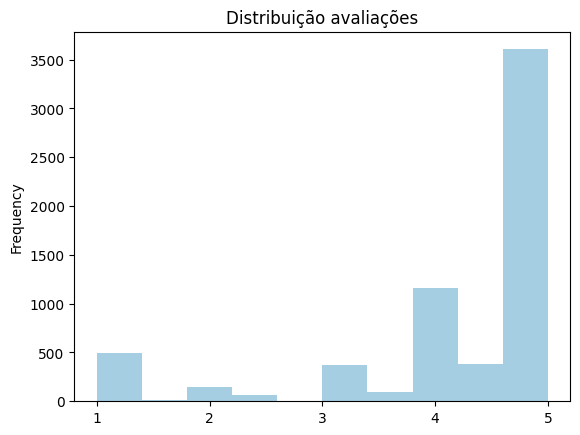

In [56]:
categ_vendedor['score'].plot.hist(title='Distribuição avaliações',cmap='Paired')
plt.xticks([1,2,3,4,5])
plt.show()

In [63]:
categ_vendedor['score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       5.0
1       4.0
2       5.0
3       1.0
4       5.0
       ... 
6331    1.0
6332    1.0
6333    5.0
6334    5.0
6335    1.0
Name: score, Length: 6336, dtype: float64>

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'vendas_total'}>],
       [<AxesSubplot:title={'center':'entrega_antecipacao'}>,
        <AxesSubplot:title={'center':'score'}>]], dtype=object)

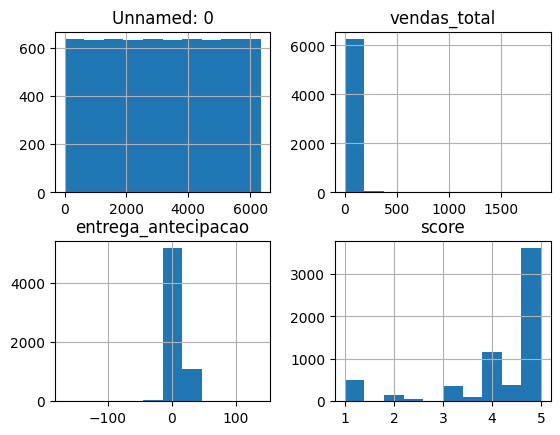

In [61]:
categ_vendedor.hist()

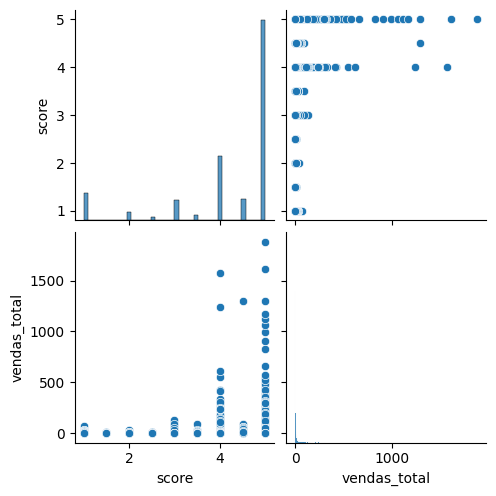

In [62]:
sns.pairplot(categ_vendedor[['score', 'vendas_total']])
plt.show()